### A basic autoencoder
- Inspirations:
    - https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from keras.datasets import mnist
import numpy as np

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from datetime import datetime
from math import sqrt

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
### Load dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.      # between 0-1
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))  
x_test = np.reshape(x_test, (len(x_test), 784))  

In [3]:
### Simple deep model

input_img = Input(shape=(784,))

encoded = Dense(256, activation='relu')(input_img)   ###
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
### Tensorboard
timestamp = datetime.now().strftime("%Y-%m-%d_%H:%M")

tensorboard = TensorBoard(log_dir='./.logs/mnist_autoencoder/{}'.format(timestamp), 
                            histogram_freq=0, 
                            write_graph=True, 
                            write_grads=True, 
                            write_images=True, 
                            embeddings_freq=0, 
                            embeddings_layer_names=None, 
                            embeddings_metadata=None)

Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
history = autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test),
               callbacks=[tensorboard],
               verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.3366 - val_loss: 0.2585
Epoch 2/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2539 - val_loss: 0.2533
Epoch 3/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2494 - val_loss: 0.2439
Epoch 4/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2375 - val_loss: 0.2294
Epoch 5/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2252 - val_loss: 0.2205
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2194 - val_loss: 0.2161
Epoch 7/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2134 - val_loss: 0.2061
Epoch 8/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2018 - val_loss: 0.1974
Epoch 9/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1904 - val_loss: 0.1

60000/60000 [==============================] - 5s 83us/step - loss: 0.1092 - val_loss: 0.1073
Epoch 78/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1089 - val_loss: 0.1083
Epoch 79/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1086 - val_loss: 0.1084
Epoch 80/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1085 - val_loss: 0.1087
Epoch 81/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1082 - val_loss: 0.1073
Epoch 82/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1079 - val_loss: 0.1072
Epoch 83/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1076 - val_loss: 0.1065
Epoch 84/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1075 - val_loss: 0.1073
Epoch 85/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1072 - val_loss: 0.1052
Epoch 86/100
60000/60000 [========================

In [6]:
### TODO: save history
# history

In [7]:
def plotImages(original, encoded, decoded):
    """ visualize results"""
    for i in range(len(original)):
        ax = plt.subplot(1,3,1)
        sqr_shape = int(sqrt(original.shape[1]))
        ax.imshow(original[i].reshape(sqr_shape,sqr_shape))
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set(title="Original")

        ###
        ax = plt.subplot(1,3,2)
        ax.imshow(encoded[i].reshape(8,4))
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set(title="Low dimensional\n representation")

        
        ###
        ax = plt.subplot(1,3,3)
        sqr_shape = int(sqrt(decoded.shape[1]))
        ax.imshow(decoded[i].reshape(sqr_shape,sqr_shape))
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set(title="Reconstructed")

        plt.pause(0.1)
        

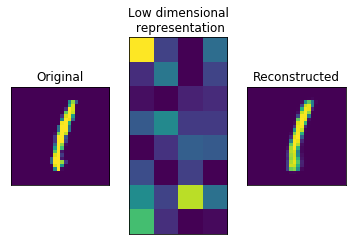

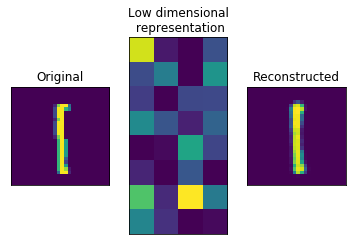

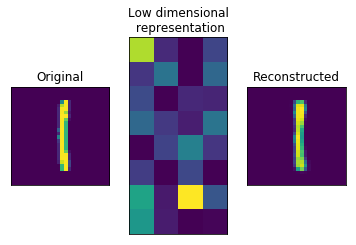

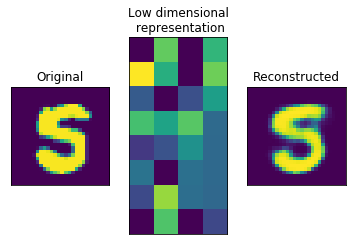

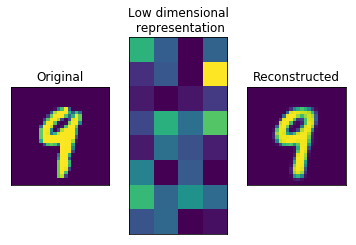

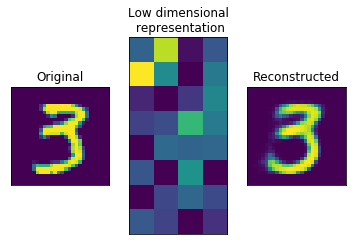

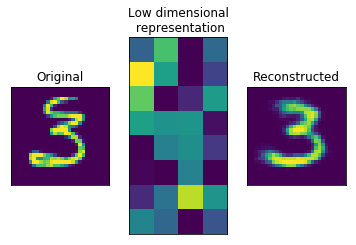

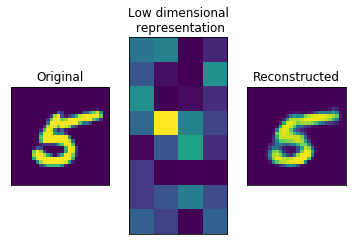

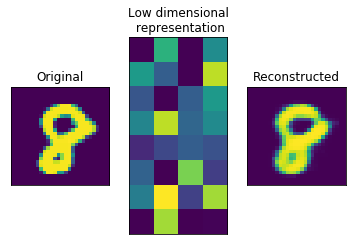

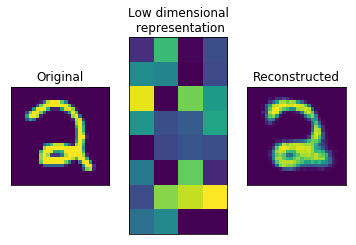

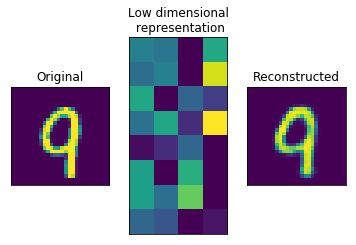

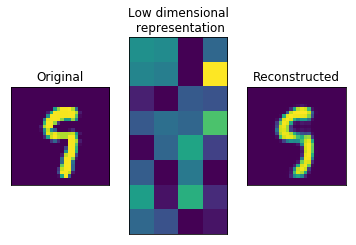

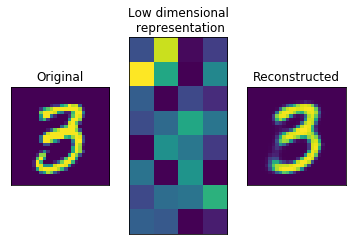

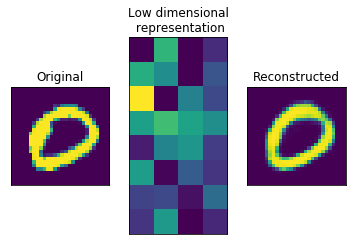

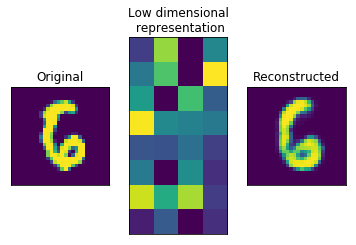

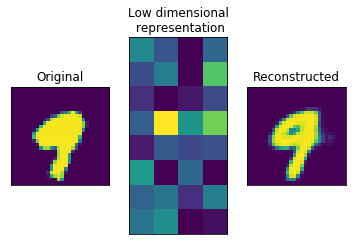

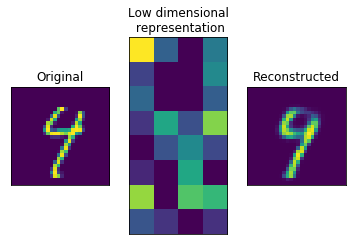

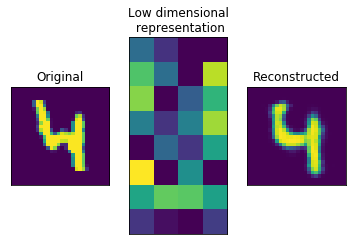

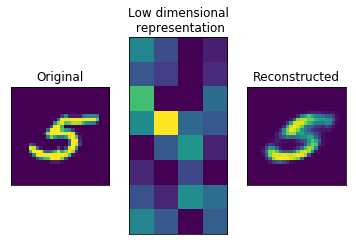

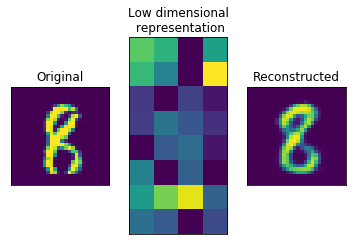

In [8]:
### Test it!!

encoder = Model(input_img, encoded)

test_set = x_test[np.random.choice(len(x_test), size=20)]

encoded_imgs = encoder.predict(test_set)
decoded_imgs = autoencoder.predict(test_set)

### Inspect results
plotImages(test_set, encoded_imgs, decoded_imgs)